## 图像直方图
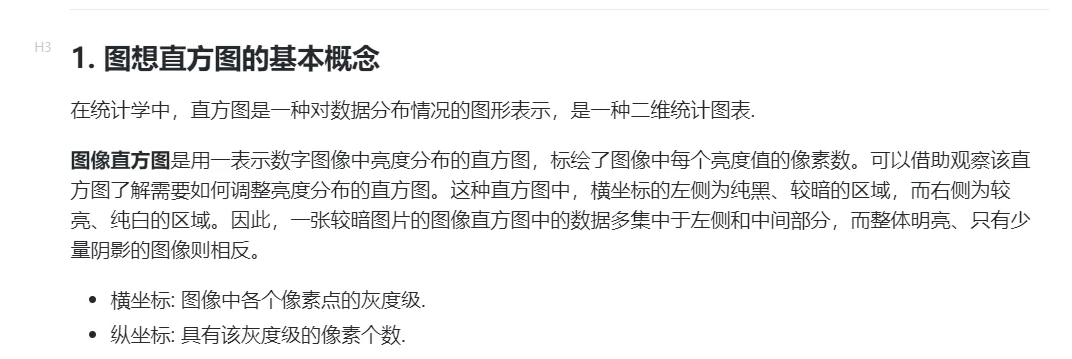
直方图就是各种灰度出现的次数画出的直方统计图
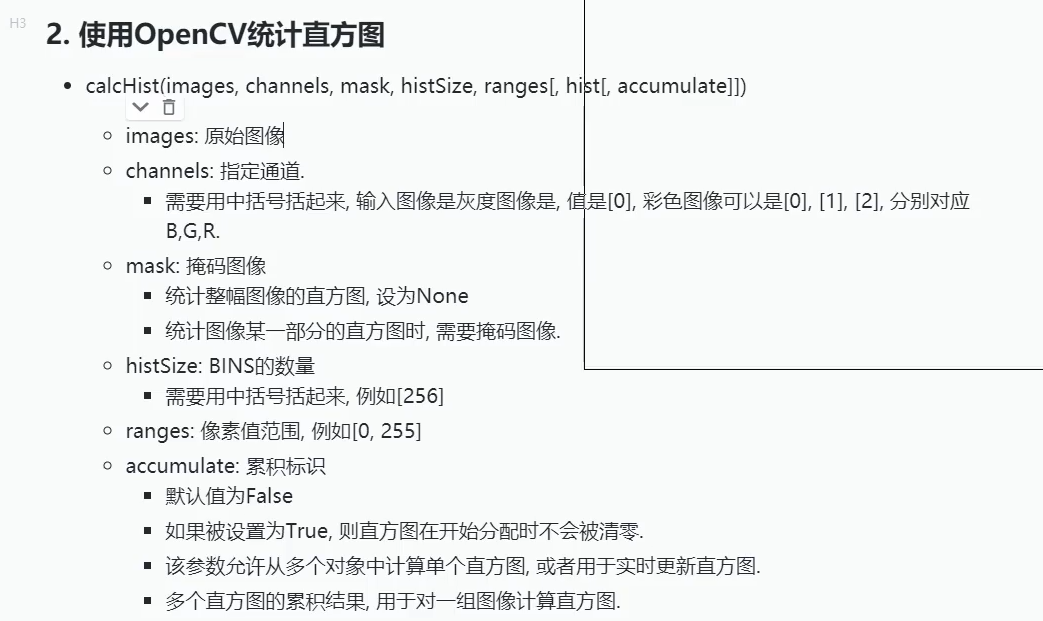

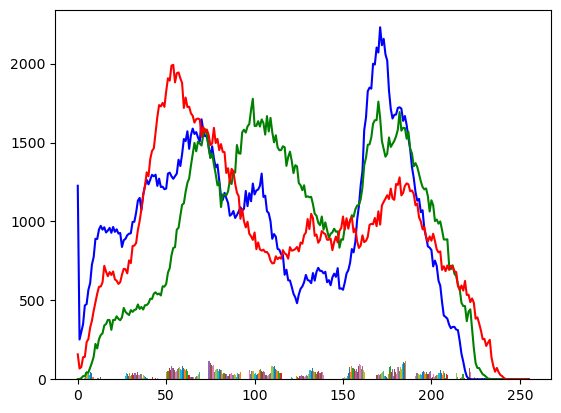

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

mountain=cv2.imread('./mountain.jpg')
#使用calcHist()进行统计
gray=cv2.cvtColor(mountain,cv2.COLOR_BGR2GRAY)

histb=cv2.calcHist([mountain],[0],None,[256],[0,255])
histg=cv2.calcHist([mountain],[1],None,[256],[0,255])
histr=cv2.calcHist([mountain],[2],None,[256],[0,255])
#直接用plt绘制直方图
plt.hist(gray)
#使用OPENCV的方法
plt.plot(histb,color='b')
plt.plot(histg,color='g')
plt.plot(histr,color='r')
cv2.waitKey(0)
cv2.destroyAllWindows()

## 直方图均衡化
把比较少的像素的灰度分配到别的灰度中，像素相对集中，处理后灰度范围变大，对比度变大，清晰度变大
可用于增强图像

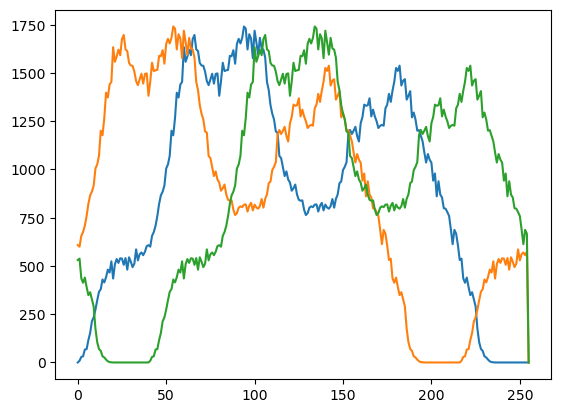

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

mountain=cv2.imread('./mountain.jpg')
gray=cv2.cvtColor(mountain,cv2.COLOR_BGR2GRAY)

#mountain变黑
mountain_dark=gray-40
#变亮
mountain_bright=gray+40

#查看各自直方图
hist_gray=cv2.calcHist([gray],[0],None,[256],[0,255])
hist_dark=cv2.calcHist([mountain_dark],[0],None,[256],[0,255])
hist_bright=cv2.calcHist([mountain_bright],[0],None,[256],[0,255])

plt.plot(hist_gray)
plt.plot(hist_dark)
plt.plot(hist_bright)

#进行均衡化处理
dark_equ=cv2.equalizeHist(mountain_dark)
bright_equ=cv2.equalizeHist(mountain_bright)

cv2.imshow('show1',np.hstack((mountain_dark,dark_equ)))
cv2.imshow('show2',np.hstack((mountain_bright,bright_equ)))

cv2.waitKey(0)
cv2.destroyAllWindows()

## 使用掩膜的直方图
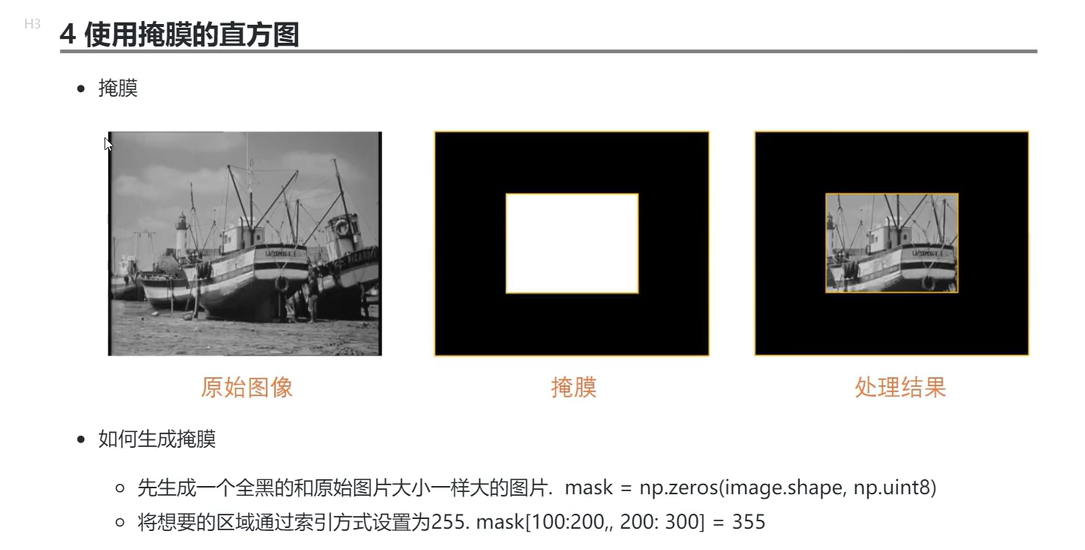

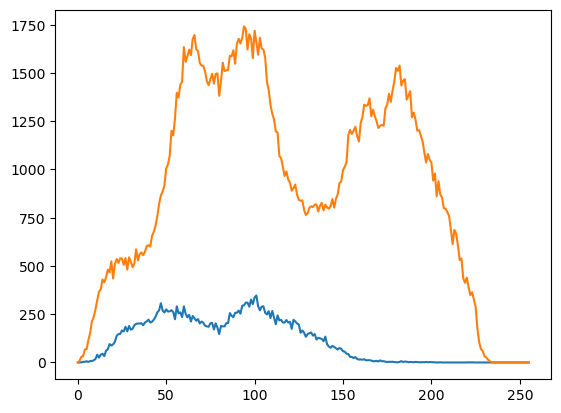

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

mountain=cv2.imread('./mountain.jpg')
gray=cv2.cvtColor(mountain,cv2.COLOR_BGR2GRAY)

#设置掩膜
mask=np.zeros(gray.shape,np.uint8)
mask[200:400,200:400]=255

#查看各自直方图
hist_mask=cv2.calcHist([gray],[0],mask,[256],[0,255])
hist_img=cv2.calcHist([gray],[0],None,[256],[0,255])

plt.plot(hist_mask)
plt.plot(hist_img)

#进行均衡化处理
dark_equ=cv2.equalizeHist(mountain_dark)
bright_equ=cv2.equalizeHist(mountain_bright)

cv2.imshow('show1',cv2.bitwise_and(gray,gray,mask=mask))
cv2.waitKey(0)
cv2.destroyAllWindows()